<a href="https://colab.research.google.com/github/Pranavi2606/EDA_02/blob/main/EDA_M6_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#21BDS0002 PRANAVI T

#PCA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load the Crime dataset
crime_data = pd.read_csv('/content/Crime.csv')

In [ ]:
# Select numeric columns for PCA (adjust based on your dataset)
crime_numeric = crime_data.select_dtypes(include=['float64', 'int64'])

# Standardize the features
scaler = StandardScaler()
crime_scaled = scaler.fit_transform(crime_numeric)

# Perform PCA
pca_crime = PCA()
crime_pca_components = pca_crime.fit_transform(crime_scaled)

# PCA Results: Eigenvalues and Loadings
print("Explained Variance (Eigenvalues):", pca_crime.explained_variance_ratio_)
print("Component Loadings:")
print(pd.DataFrame(pca_crime.components_, columns=crime_numeric.columns))

Explained Variance (Eigenvalues): [2.26326904e-01 9.67837321e-02 7.24762695e-02 6.51628115e-02
 5.55669161e-02 4.79278950e-02 4.73056842e-02 4.19285819e-02
 3.71313288e-02 3.45001579e-02 3.41993949e-02 3.17534228e-02
 3.04487270e-02 2.64174270e-02 2.41152758e-02 2.20248055e-02
 1.76507479e-02 1.38706335e-02 1.28167473e-02 1.01563035e-02
 8.44806438e-03 7.53417738e-03 6.02676416e-03 4.62589561e-03
 3.97810601e-03 3.66923988e-03 2.80890999e-03 2.50378607e-03
 2.31057293e-03 1.89721156e-03 1.82046857e-03 1.40629568e-03
 1.13003010e-03 7.47480103e-04 5.90927682e-04 4.67671062e-04
 4.22238891e-04 3.86997267e-04 3.40291113e-04 1.59583170e-04
 9.38791535e-05 5.90543846e-05 8.58802167e-06]
Component Loadings:
    rownames    county      year    crmrte    prbarr   prbconv   prbpris  \
0  -0.001461 -0.003690  0.207981  0.169035 -0.092491 -0.040557  0.020962   
1  -0.017825 -0.014205 -0.255496  0.257786 -0.262025 -0.185411  0.138687   
2   0.224339  0.227329 -0.076792  0.253744  0.069607  0.25280

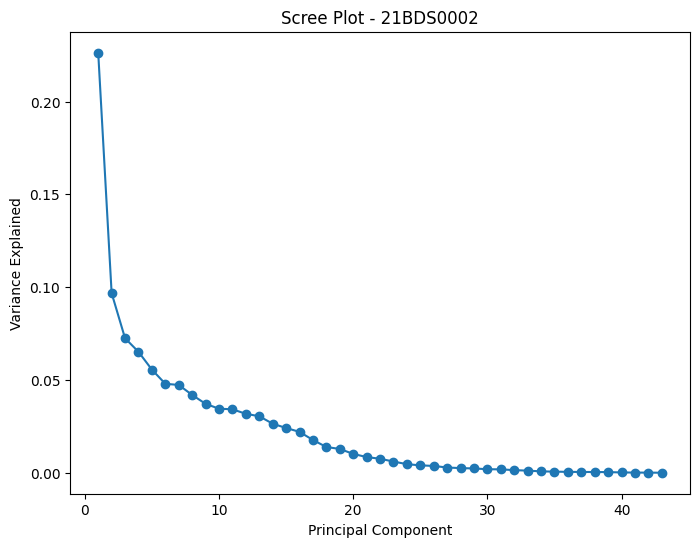

In [ ]:
# Scree Plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca_crime.explained_variance_ratio_) + 1), pca_crime.explained_variance_ratio_, marker='o')
plt.title('Scree Plot - 21BDS0002')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

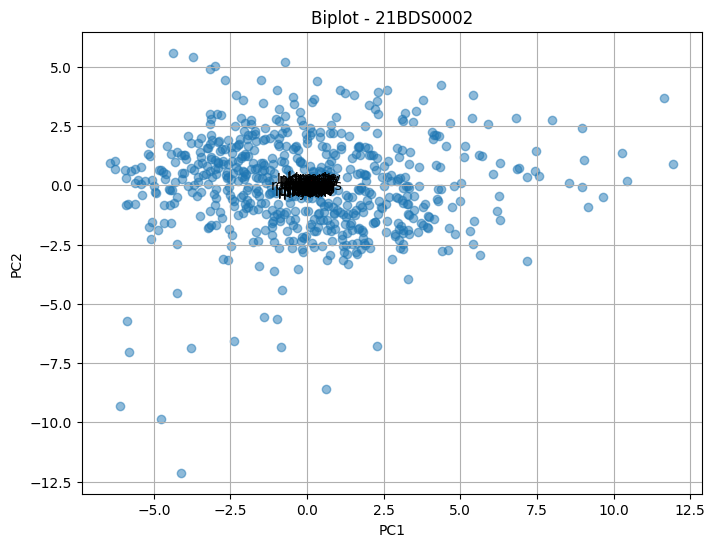

In [ ]:
# Select number of components based on scree plot
n_comp = 2
pca_crime_selected = PCA(n_components=n_comp)
crime_pca_selected_components = pca_crime_selected.fit_transform(crime_scaled)

# Biplot
plt.figure(figsize=(8, 6))
plt.scatter(crime_pca_selected_components[:, 0], crime_pca_selected_components[:, 1], alpha=0.5)
for i, feature in enumerate(crime_numeric.columns):
    plt.arrow(0, 0, pca_crime_selected.components_[0, i], pca_crime_selected.components_[1, i], color='r', alpha=0.7)
    plt.text(pca_crime_selected.components_[0, i]*1.1, pca_crime_selected.components_[1, i]*1.1, feature, color='black', ha='center', va='center')
plt.title('Biplot - 21BDS0002')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()


In [ ]:
# PCA Summary
print("PCA Summary for Crime Dataset:")
print(pd.DataFrame(crime_pca_selected_components, columns=[f"PC{i+1}" for i in range(n_comp)]).describe())

PCA Summary for Crime Dataset:
                PC1           PC2
count  6.300000e+02  6.300000e+02
mean  -4.511382e-17  2.255691e-17
std    3.122103e+00  2.041646e+00
min   -6.436488e+00 -1.212682e+01
25%   -2.237587e+00 -1.202476e+00
50%   -1.469165e-01  8.792918e-02
75%    1.887854e+00  1.276757e+00
max    1.195334e+01  5.594714e+00
